# PySpark - Работа с DataFrame

## Введение в DataFrame
DataFrame - это распределенная коллекция данных, организованная в именованные столбцы. Концептуально, он эквивалентен таблице в реляционной базе данных или DataFrame в R/Python, но с гораздо более богатыми возможностями оптимизации. В этом ноутбуке мы рассмотрим основные концепции и операции с DataFrame в PySpark.

## Содержание
1. Инициализация Spark и создание SparkSession
2. Создание DataFrame
3. Структура и схема DataFrame
4. Основные операции с DataFrame
5. Работа со столбцами
6. Фильтрация и сортировка
7. Агрегирование данных
8. Операции над несколькими DataFrame
9. Работа с типами данных
10. Практические примеры

In [ ]:
!pip install findspark pandas matplotlib

In [1]:
import findspark
findspark.init()

## 1. Инициализация Spark и создание SparkSession

In [2]:
# Импорт необходимых библиотек
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Создание SparkSession
spark = (SparkSession
    .builder
    .appName("DataFrame Practice")
    .master("local[*]")
    .getOrCreate()
)

# Проверка версии Spark
print(f"Spark Version: {spark.version}")



Spark Version: 3.0.3


## 2. Создание DataFrame
Существует несколько способов создания DataFrame в PySpark.

### Создание DataFrame из списка



In [4]:
# Создание DataFrame из списка данных
data = [("James", "Smith", "USA", "CA", 32),
        ("Michael", "Rose", "USA", "NY", 41),
        ("Robert", "Williams", "USA", "CA", 42),
        ("Maria", "Jones", "USA", "FL", 38),
        ("Jen", "Brown", "UK", "London", 29)]

# Определение схемы
columns = ["firstname", "lastname", "country", "state", "age"]

# Создание DataFrame
df = spark.createDataFrame(data, columns)

# Отображение DataFrame
df.show()



+---------+--------+-------+------+---+
|firstname|lastname|country| state|age|
+---------+--------+-------+------+---+
|    James|   Smith|    USA|    CA| 32|
|  Michael|    Rose|    USA|    NY| 41|
|   Robert|Williams|    USA|    CA| 42|
|    Maria|   Jones|    USA|    FL| 38|
|      Jen|   Brown|     UK|London| 29|
+---------+--------+-------+------+---+



### Создание DataFrame из источников данных
Сначала создадим несколько файлов с данными для примеров.

In [5]:
# Создание CSV-файла
csv_data = """id,name,age,department,salary
1,John,30,HR,55000
2,Alice,25,IT,65000
3,Bob,40,Finance,70000
4,Carol,35,IT,68000
5,David,45,Marketing,60000
6,Eva,28,HR,50000
7,Frank,50,Finance,75000
8,Grace,33,Marketing,62000
9,Henry,31,IT,69000
10,Ivy,27,HR,53000
"""

with open("employees.csv", "w") as f:
    f.write(csv_data)

# Создание JSON-файла
json_data = """
{"id": 1, "name": "Product A", "category": "Electronics", "price": 1200.50, "stock": 100}
{"id": 2, "name": "Product B", "category": "Clothing", "price": 25.99, "stock": 200}
{"id": 3, "name": "Product C", "category": "Electronics", "price": 499.99, "stock": 50}
{"id": 4, "name": "Product D", "category": "Home & Kitchen", "price": 99.95, "stock": 150}
{"id": 5, "name": "Product E", "category": "Clothing", "price": 35.50, "stock": 300}
"""

with open("products.json", "w") as f:
    f.write(json_data)

In [ ]:
# для кластера
!hadoop fs -put -f employees.csv /user/ubuntu/employees.csv
!hadoop fs -put -f products.json /user/ubuntu/products.json

### Чтение из CSV-файла



In [8]:
# Чтение DataFrame из CSV
employees_df = spark.read.csv("employees.csv", header=True, inferSchema=True)
employees_df.show()



+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  1| John| 30|        HR| 55000|
|  2|Alice| 25|        IT| 65000|
|  3|  Bob| 40|   Finance| 70000|
|  4|Carol| 35|        IT| 68000|
|  5|David| 45| Marketing| 60000|
|  6|  Eva| 28|        HR| 50000|
|  7|Frank| 50|   Finance| 75000|
|  8|Grace| 33| Marketing| 62000|
|  9|Henry| 31|        IT| 69000|
| 10|  Ivy| 27|        HR| 53000|
+---+-----+---+----------+------+



In [9]:
# Информация о схеме
employees_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: integer (nullable = true)



### Чтение из JSON-файла



In [10]:
# Чтение DataFrame из JSON
products_df = spark.read.json("products.json")
products_df.show()


+--------------+---+---------+------+-----+
|      category| id|     name| price|stock|
+--------------+---+---------+------+-----+
|   Electronics|  1|Product A|1200.5|  100|
|      Clothing|  2|Product B| 25.99|  200|
|   Electronics|  3|Product C|499.99|   50|
|Home & Kitchen|  4|Product D| 99.95|  150|
|      Clothing|  5|Product E|  35.5|  300|
+--------------+---+---------+------+-----+



In [11]:
products_df.printSchema()

root
 |-- category: string (nullable = true)
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- stock: long (nullable = true)



### Создание DataFrame из Pandas DataFrame



In [12]:
# Создание Pandas DataFrame
pandas_df = pd.DataFrame({
    'product_id': [1, 2, 3, 4, 5],
    'product_name': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Keyboard'],
    'price': [1200.0, 800.5, 350.75, 250.0, 50.0],
    'in_stock': [True, True, False, True, False]
})

In [13]:
# Преобразование в PySpark DataFrame
spark_df = spark.createDataFrame(pandas_df)
spark_df.show()

+----------+------------+------+--------+
|product_id|product_name| price|in_stock|
+----------+------------+------+--------+
|         1|      Laptop|1200.0|    true|
|         2|       Phone| 800.5|    true|
|         3|      Tablet|350.75|   false|
|         4|     Monitor| 250.0|    true|
|         5|    Keyboard|  50.0|   false|
+----------+------------+------+--------+



In [14]:
# Информация о схеме
spark_df.printSchema()

root
 |-- product_id: long (nullable = true)
 |-- product_name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- in_stock: boolean (nullable = true)



## 3. Структура и схема DataFrame

### Просмотр схемы DataFrame



In [ ]:
# Отображение схемы DataFrame
employees_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: integer (nullable = true)



In [ ]:
# Получение схемы в виде структуры
schema = employees_df.schema
print(schema)


StructType(List(StructField(id,IntegerType,true),StructField(name,StringType,true),StructField(age,IntegerType,true),StructField(department,StringType,true),StructField(salary,IntegerType,true)))


### Определение пользовательской схемы



In [17]:
# Определение пользовательской схемы
custom_schema = StructType([
    StructField("student_id", StringType(), False),
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("gpa", DoubleType(), True),
    StructField("active", BooleanType(), True)
])



In [18]:
# Данные
data = [
    ("S001", "Alice", 20, 3.8, True),
    ("S002", "Bob", 22, 3.5, True),
    ("S003", "Charlie", 21, 3.9, False),
    ("S004", "Diana", 23, 3.7, True)
]

# Создание DataFrame с пользовательской схемой
students_df = spark.createDataFrame(data, custom_schema)
students_df.show()
students_df.printSchema()



+----------+-------+---+---+------+
|student_id|   name|age|gpa|active|
+----------+-------+---+---+------+
|      S001|  Alice| 20|3.8|  true|
|      S002|    Bob| 22|3.5|  true|
|      S003|Charlie| 21|3.9| false|
|      S004|  Diana| 23|3.7|  true|
+----------+-------+---+---+------+

root
 |-- student_id: string (nullable = false)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gpa: double (nullable = true)
 |-- active: boolean (nullable = true)



### Получение информации о столбцах



In [ ]:
# Получение имен столбцов
columns = employees_df.columns
print("Columns:", columns)


Columns: ['id', 'name', 'age', 'department', 'salary']


In [ ]:
# Получение типов данных столбцов
dtypes = employees_df.dtypes
print("Data Types:", dtypes)


Data Types: [('id', 'int'), ('name', 'string'), ('age', 'int'), ('department', 'string'), ('salary', 'int')]


In [ ]:
# Базовая статистика по числовым столбцам
employees_df.describe().show()

+-------+------------------+-----+-----------------+----------+-----------------+
|summary|                id| name|              age|department|           salary|
+-------+------------------+-----+-----------------+----------+-----------------+
|  count|                10|   10|               10|        10|               10|
|   mean|               5.5| null|             34.4|      null|          62700.0|
| stddev|3.0276503540974917| null|8.194849330863597|      null|8165.646194746487|
|    min|                 1|Alice|               25|   Finance|            50000|
|    max|                10| John|               50| Marketing|            75000|
+-------+------------------+-----+-----------------+----------+-----------------+



## 4. Основные операции с DataFrame

### select() - выбор столбцов



In [ ]:
# Выбор отдельных столбцов
employees_df.select("name", "age", "salary").show()

+-----+---+------+
| name|age|salary|
+-----+---+------+
| John| 30| 55000|
|Alice| 25| 65000|
|  Bob| 40| 70000|
|Carol| 35| 68000|
|David| 45| 60000|
|  Eva| 28| 50000|
|Frank| 50| 75000|
|Grace| 33| 62000|
|Henry| 31| 69000|
|  Ivy| 27| 53000|
+-----+---+------+



In [23]:
# Выбор с использованием выражений
employees_df.select(
    col("name"),
    col("age"),
    col("salary"),
    (col("salary") / 12).alias("monthly_salary")
).show()



+-----+---+------+-----------------+
| name|age|salary|   monthly_salary|
+-----+---+------+-----------------+
| John| 30| 55000|4583.333333333333|
|Alice| 25| 65000|5416.666666666667|
|  Bob| 40| 70000|5833.333333333333|
|Carol| 35| 68000|5666.666666666667|
|David| 45| 60000|           5000.0|
|  Eva| 28| 50000|4166.666666666667|
|Frank| 50| 75000|           6250.0|
|Grace| 33| 62000|5166.666666666667|
|Henry| 31| 69000|           5750.0|
|  Ivy| 27| 53000|4416.666666666667|
+-----+---+------+-----------------+



### withColumn() - добавление/изменение столбца



In [24]:
# Добавление нового столбца
employees_with_bonus = employees_df.withColumn(
    "bonus", col("salary") * 0.1
)
employees_with_bonus.show()



+---+-----+---+----------+------+------+
| id| name|age|department|salary| bonus|
+---+-----+---+----------+------+------+
|  1| John| 30|        HR| 55000|5500.0|
|  2|Alice| 25|        IT| 65000|6500.0|
|  3|  Bob| 40|   Finance| 70000|7000.0|
|  4|Carol| 35|        IT| 68000|6800.0|
|  5|David| 45| Marketing| 60000|6000.0|
|  6|  Eva| 28|        HR| 50000|5000.0|
|  7|Frank| 50|   Finance| 75000|7500.0|
|  8|Grace| 33| Marketing| 62000|6200.0|
|  9|Henry| 31|        IT| 69000|6900.0|
| 10|  Ivy| 27|        HR| 53000|5300.0|
+---+-----+---+----------+------+------+



In [ ]:
# Изменение существующего столбца
employees_modified = employees_df.withColumn(
    "salary", col("salary") + 5000
)
employees_modified.show()

+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  1| John| 30|        HR| 60000|
|  2|Alice| 25|        IT| 70000|
|  3|  Bob| 40|   Finance| 75000|
|  4|Carol| 35|        IT| 73000|
|  5|David| 45| Marketing| 65000|
|  6|  Eva| 28|        HR| 55000|
|  7|Frank| 50|   Finance| 80000|
|  8|Grace| 33| Marketing| 67000|
|  9|Henry| 31|        IT| 74000|
| 10|  Ivy| 27|        HR| 58000|
+---+-----+---+----------+------+



### withColumnRenamed() - переименование столбца



In [ ]:
# Переименование столбца
employees_renamed = employees_df.withColumnRenamed("department", "dept")
employees_renamed.show()

+---+-----+---+---------+------+
| id| name|age|     dept|salary|
+---+-----+---+---------+------+
|  1| John| 30|       HR| 55000|
|  2|Alice| 25|       IT| 65000|
|  3|  Bob| 40|  Finance| 70000|
|  4|Carol| 35|       IT| 68000|
|  5|David| 45|Marketing| 60000|
|  6|  Eva| 28|       HR| 50000|
|  7|Frank| 50|  Finance| 75000|
|  8|Grace| 33|Marketing| 62000|
|  9|Henry| 31|       IT| 69000|
| 10|  Ivy| 27|       HR| 53000|
+---+-----+---+---------+------+



### drop() - удаление столбца



In [ ]:
# Удаление столбца
employees_df.drop("department").show()

+---+-----+---+------+
| id| name|age|salary|
+---+-----+---+------+
|  1| John| 30| 55000|
|  2|Alice| 25| 65000|
|  3|  Bob| 40| 70000|
|  4|Carol| 35| 68000|
|  5|David| 45| 60000|
|  6|  Eva| 28| 50000|
|  7|Frank| 50| 75000|
|  8|Grace| 33| 62000|
|  9|Henry| 31| 69000|
| 10|  Ivy| 27| 53000|
+---+-----+---+------+



In [ ]:
# Удаление нескольких столбцов
employees_df.drop("department", "salary").show()

+---+-----+---+
| id| name|age|
+---+-----+---+
|  1| John| 30|
|  2|Alice| 25|
|  3|  Bob| 40|
|  4|Carol| 35|
|  5|David| 45|
|  6|  Eva| 28|
|  7|Frank| 50|
|  8|Grace| 33|
|  9|Henry| 31|
| 10|  Ivy| 27|
+---+-----+---+



## 5. Работа со столбцами

### Функции для работы со строками



In [ ]:
# Работа со строковыми функциями
df_string = employees_df.select(
    col("name"),
    upper(col("name")).alias("upper_name"),
    lower(col("name")).alias("lower_name"),
    length(col("name")).alias("name_length"),
    concat(col("name"), lit(" - "), col("department")).alias("name_dept")
)
df_string.show()


+-----+----------+----------+-----------+-----------------+
| name|upper_name|lower_name|name_length|        name_dept|
+-----+----------+----------+-----------+-----------------+
| John|      JOHN|      john|          4|        John - HR|
|Alice|     ALICE|     alice|          5|       Alice - IT|
|  Bob|       BOB|       bob|          3|    Bob - Finance|
|Carol|     CAROL|     carol|          5|       Carol - IT|
|David|     DAVID|     david|          5|David - Marketing|
|  Eva|       EVA|       eva|          3|         Eva - HR|
|Frank|     FRANK|     frank|          5|  Frank - Finance|
|Grace|     GRACE|     grace|          5|Grace - Marketing|
|Henry|     HENRY|     henry|          5|       Henry - IT|
|  Ivy|       IVY|       ivy|          3|         Ivy - HR|
+-----+----------+----------+-----------+-----------------+



In [ ]:
### Функции для работы с числами

# Работа с числовыми функциями
df_numeric = employees_df.select(
    col("name"),
    col("salary"),
    round(col("salary"), -3).alias("rounded_salary"),
    sqrt(col("age")).alias("sqrt_age"),
    abs(col("salary") - 60000).alias("salary_diff_from_60k")
)
df_numeric.show()

+-----+------+--------------+------------------+--------------------+
| name|salary|rounded_salary|          sqrt_age|salary_diff_from_60k|
+-----+------+--------------+------------------+--------------------+
| John| 55000|         55000| 5.477225575051661|                5000|
|Alice| 65000|         65000|               5.0|                5000|
|  Bob| 70000|         70000| 6.324555320336759|               10000|
|Carol| 68000|         68000| 5.916079783099616|                8000|
|David| 60000|         60000| 6.708203932499369|                   0|
|  Eva| 50000|         50000| 5.291502622129181|               10000|
|Frank| 75000|         75000|7.0710678118654755|               15000|
|Grace| 62000|         62000| 5.744562646538029|                2000|
|Henry| 69000|         69000|5.5677643628300215|                9000|
|  Ivy| 53000|         53000| 5.196152422706632|                7000|
+-----+------+--------------+------------------+--------------------+



### Функции для работы с датами



In [ ]:
# Создание данных с датами
date_data = [
    ("2023-01-15", "2023-01-15 10:30:00"),
    ("2023-02-20", "2023-02-20 15:45:00"),
    ("2023-03-25", "2023-03-25 08:15:00"),
    ("2023-04-10", "2023-04-10 19:20:00")
]
date_columns = ["date_str", "timestamp_str"]
date_df = spark.createDataFrame(date_data, date_columns)

In [ ]:
# Преобразование строк в даты и временные метки
date_df_converted = date_df.select(
    col("date_str"),
    to_date(col("date_str")).alias("date"),
    col("timestamp_str"),
    to_timestamp(col("timestamp_str")).alias("timestamp")
)
date_df_converted.show()

+----------+----------+-------------------+-------------------+
|  date_str|      date|      timestamp_str|          timestamp|
+----------+----------+-------------------+-------------------+
|2023-01-15|2023-01-15|2023-01-15 10:30:00|2023-01-15 10:30:00|
|2023-02-20|2023-02-20|2023-02-20 15:45:00|2023-02-20 15:45:00|
|2023-03-25|2023-03-25|2023-03-25 08:15:00|2023-03-25 08:15:00|
|2023-04-10|2023-04-10|2023-04-10 19:20:00|2023-04-10 19:20:00|
+----------+----------+-------------------+-------------------+



In [ ]:
# Извлечение частей даты
date_parts_df = date_df_converted.select(
    col("date"),
    year(col("date")).alias("year"),
    month(col("date")).alias("month"),
    dayofmonth(col("date")).alias("day"),
    col("timestamp"),
    hour(col("timestamp")).alias("hour"),
    minute(col("timestamp")).alias("minute")
)
date_parts_df.show()

+----------+----+-----+---+-------------------+----+------+
|      date|year|month|day|          timestamp|hour|minute|
+----------+----+-----+---+-------------------+----+------+
|2023-01-15|2023|    1| 15|2023-01-15 10:30:00|  10|    30|
|2023-02-20|2023|    2| 20|2023-02-20 15:45:00|  15|    45|
|2023-03-25|2023|    3| 25|2023-03-25 08:15:00|   8|    15|
|2023-04-10|2023|    4| 10|2023-04-10 19:20:00|  19|    20|
+----------+----+-----+---+-------------------+----+------+



In [ ]:
# Добавление/вычитание дней
date_calc_df = date_df_converted.select(
    col("date"),
    date_add(col("date"), 7).alias("date_plus_7days"),
    date_sub(col("date"), 7).alias("date_minus_7days"),
    datediff(current_date(), col("date")).alias("days_since")
)
date_calc_df.show()

+----------+---------------+----------------+----------+
|      date|date_plus_7days|date_minus_7days|days_since|
+----------+---------------+----------------+----------+
|2023-01-15|     2023-01-22|      2023-01-08|       796|
|2023-02-20|     2023-02-27|      2023-02-13|       760|
|2023-03-25|     2023-04-01|      2023-03-18|       727|
|2023-04-10|     2023-04-17|      2023-04-03|       711|
+----------+---------------+----------------+----------+



## 6. Фильтрация и сортировка

### filter() и where() - фильтрация строк

In [ ]:
# Фильтрация с помощью filter
employees_df.filter(col("age") > 35).show()

+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  3|  Bob| 40|   Finance| 70000|
|  5|David| 45| Marketing| 60000|
|  7|Frank| 50|   Finance| 75000|
+---+-----+---+----------+------+



In [ ]:
# Фильтрация с использованием where (эквивалентно filter)
employees_df.where(col("department") == "IT").show()

+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  2|Alice| 25|        IT| 65000|
|  4|Carol| 35|        IT| 68000|
|  9|Henry| 31|        IT| 69000|
+---+-----+---+----------+------+



In [ ]:
# Комбинированные условия
employees_df.filter(
    (col("age") > 30) & (col("department").isin("IT", "Finance"))
).show()

+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  3|  Bob| 40|   Finance| 70000|
|  4|Carol| 35|        IT| 68000|
|  7|Frank| 50|   Finance| 75000|
|  9|Henry| 31|        IT| 69000|
+---+-----+---+----------+------+



In [38]:
# Использование SQL-выражений
employees_df.filter("salary >= 65000 AND department != 'Marketing'").show()



+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  2|Alice| 25|        IT| 65000|
|  3|  Bob| 40|   Finance| 70000|
|  4|Carol| 35|        IT| 68000|
|  7|Frank| 50|   Finance| 75000|
|  9|Henry| 31|        IT| 69000|
+---+-----+---+----------+------+



### orderBy() и sort() - сортировка



In [39]:
# Сортировка по одному столбцу
employees_df.orderBy("salary").show()



+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  6|  Eva| 28|        HR| 50000|
| 10|  Ivy| 27|        HR| 53000|
|  1| John| 30|        HR| 55000|
|  5|David| 45| Marketing| 60000|
|  8|Grace| 33| Marketing| 62000|
|  2|Alice| 25|        IT| 65000|
|  4|Carol| 35|        IT| 68000|
|  9|Henry| 31|        IT| 69000|
|  3|  Bob| 40|   Finance| 70000|
|  7|Frank| 50|   Finance| 75000|
+---+-----+---+----------+------+



In [40]:
# Сортировка по нескольким столбцам
employees_df.orderBy(col("department"), col("salary").desc()).show()



+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  7|Frank| 50|   Finance| 75000|
|  3|  Bob| 40|   Finance| 70000|
|  1| John| 30|        HR| 55000|
| 10|  Ivy| 27|        HR| 53000|
|  6|  Eva| 28|        HR| 50000|
|  9|Henry| 31|        IT| 69000|
|  4|Carol| 35|        IT| 68000|
|  2|Alice| 25|        IT| 65000|
|  8|Grace| 33| Marketing| 62000|
|  5|David| 45| Marketing| 60000|
+---+-----+---+----------+------+



In [41]:
# Эквивалентно с использованием sort()
employees_df.sort(col("department"), col("salary").desc()).show()



+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  7|Frank| 50|   Finance| 75000|
|  3|  Bob| 40|   Finance| 70000|
|  1| John| 30|        HR| 55000|
| 10|  Ivy| 27|        HR| 53000|
|  6|  Eva| 28|        HR| 50000|
|  9|Henry| 31|        IT| 69000|
|  4|Carol| 35|        IT| 68000|
|  2|Alice| 25|        IT| 65000|
|  8|Grace| 33| Marketing| 62000|
|  5|David| 45| Marketing| 60000|
+---+-----+---+----------+------+



## 7. Агрегирование данных

### groupBy() - группировка данных



In [42]:
# Группировка по отделу и подсчет сотрудников
employees_df.groupBy("department").count().show()



+----------+-----+
|department|count|
+----------+-----+
|        HR|    3|
|   Finance|    2|
| Marketing|    2|
|        IT|    3|
+----------+-----+



In [43]:
# Группировка и вычисление нескольких метрик
dept_metrics = employees_df.groupBy("department").agg(
    count("*").alias("employee_count"),
    round(avg("salary"), 2).alias("avg_salary"),
    min("salary").alias("min_salary"),
    max("salary").alias("max_salary"),
    sum("salary").alias("total_salary")
)
dept_metrics.show()



+----------+--------------+----------+----------+----------+------------+
|department|employee_count|avg_salary|min_salary|max_salary|total_salary|
+----------+--------------+----------+----------+----------+------------+
|        HR|             3|  52666.67|     50000|     55000|      158000|
|   Finance|             2|   72500.0|     70000|     75000|      145000|
| Marketing|             2|   61000.0|     60000|     62000|      122000|
|        IT|             3|  67333.33|     65000|     69000|      202000|
+----------+--------------+----------+----------+----------+------------+



### agg() - агрегирование без группировки



In [44]:
# Агрегирование всего DataFrame
employees_df.agg(
    count("*").alias("employee_count"),
    round(avg("salary"), 2).alias("avg_salary"),
    min("salary").alias("min_salary"),
    max("salary").alias("max_salary"),
    sum("salary").alias("total_salary")
).show()



+--------------+----------+----------+----------+------------+
|employee_count|avg_salary|min_salary|max_salary|total_salary|
+--------------+----------+----------+----------+------------+
|            10|   62700.0|     50000|     75000|      627000|
+--------------+----------+----------+----------+------------+



### Оконные функции

In [45]:
# Импорт оконных функций
from pyspark.sql.window import Window

# Создание оконной спецификации
window_spec = Window.partitionBy("department").orderBy(col("salary").desc())

# Применение оконных функций
employees_with_rank = employees_df.withColumn(
    "rank", rank().over(window_spec)
).withColumn(
    "dense_rank", dense_rank().over(window_spec)
).withColumn(
    "salary_diff_from_next", 
    col("salary") - lead("salary", 1, 0).over(window_spec)
)

employees_with_rank.show()



+---+-----+---+----------+------+----+----------+---------------------+
| id| name|age|department|salary|rank|dense_rank|salary_diff_from_next|
+---+-----+---+----------+------+----+----------+---------------------+
|  1| John| 30|        HR| 55000|   1|         1|                 2000|
| 10|  Ivy| 27|        HR| 53000|   2|         2|                 3000|
|  6|  Eva| 28|        HR| 50000|   3|         3|                50000|
|  7|Frank| 50|   Finance| 75000|   1|         1|                 5000|
|  3|  Bob| 40|   Finance| 70000|   2|         2|                70000|
|  8|Grace| 33| Marketing| 62000|   1|         1|                 2000|
|  5|David| 45| Marketing| 60000|   2|         2|                60000|
|  9|Henry| 31|        IT| 69000|   1|         1|                 1000|
|  4|Carol| 35|        IT| 68000|   2|         2|                 3000|
|  2|Alice| 25|        IT| 65000|   3|         3|                65000|
+---+-----+---+----------+------+----+----------+---------------

## 8. Операции над несколькими DataFrame



In [46]:
# Создание дополнительного DataFrame для демонстрации
departments_data = [
    ("HR", "Human Resources", "Building A"),
    ("IT", "Information Technology", "Building B"),
    ("Finance", "Finance Department", "Building A"),
    ("Marketing", "Marketing Department", "Building C"),
    ("Sales", "Sales Department", "Building C")
]
departments_columns = ["dept_id", "dept_name", "location"]
departments_df = spark.createDataFrame(departments_data, departments_columns)
departments_df.show()

+---------+--------------------+----------+
|  dept_id|           dept_name|  location|
+---------+--------------------+----------+
|       HR|     Human Resources|Building A|
|       IT|Information Techn...|Building B|
|  Finance|  Finance Department|Building A|
|Marketing|Marketing Department|Building C|
|    Sales|    Sales Department|Building C|
+---------+--------------------+----------+



### `join()` - соединение DataFrame


In [47]:

# Внутреннее соединение (inner join)
inner_join_df = employees_df.join(
    departments_df,
    employees_df["department"] == departments_df["dept_id"],
    "inner"
)
inner_join_df.show()



+---+-----+---+----------+------+---------+--------------------+----------+
| id| name|age|department|salary|  dept_id|           dept_name|  location|
+---+-----+---+----------+------+---------+--------------------+----------+
| 10|  Ivy| 27|        HR| 53000|       HR|     Human Resources|Building A|
|  6|  Eva| 28|        HR| 50000|       HR|     Human Resources|Building A|
|  1| John| 30|        HR| 55000|       HR|     Human Resources|Building A|
|  9|Henry| 31|        IT| 69000|       IT|Information Techn...|Building B|
|  4|Carol| 35|        IT| 68000|       IT|Information Techn...|Building B|
|  2|Alice| 25|        IT| 65000|       IT|Information Techn...|Building B|
|  7|Frank| 50|   Finance| 75000|  Finance|  Finance Department|Building A|
|  3|  Bob| 40|   Finance| 70000|  Finance|  Finance Department|Building A|
|  8|Grace| 33| Marketing| 62000|Marketing|Marketing Department|Building C|
|  5|David| 45| Marketing| 60000|Marketing|Marketing Department|Building C|
+---+-----+-

In [48]:
# Левое внешнее соединение (left outer join)
left_join_df = employees_df.join(
    departments_df,
    employees_df["department"] == departments_df["dept_id"],
    "left"
)
left_join_df.show()



+---+-----+---+----------+------+---------+--------------------+----------+
| id| name|age|department|salary|  dept_id|           dept_name|  location|
+---+-----+---+----------+------+---------+--------------------+----------+
|  1| John| 30|        HR| 55000|       HR|     Human Resources|Building A|
|  6|  Eva| 28|        HR| 50000|       HR|     Human Resources|Building A|
| 10|  Ivy| 27|        HR| 53000|       HR|     Human Resources|Building A|
|  3|  Bob| 40|   Finance| 70000|  Finance|  Finance Department|Building A|
|  7|Frank| 50|   Finance| 75000|  Finance|  Finance Department|Building A|
|  5|David| 45| Marketing| 60000|Marketing|Marketing Department|Building C|
|  8|Grace| 33| Marketing| 62000|Marketing|Marketing Department|Building C|
|  2|Alice| 25|        IT| 65000|       IT|Information Techn...|Building B|
|  4|Carol| 35|        IT| 68000|       IT|Information Techn...|Building B|
|  9|Henry| 31|        IT| 69000|       IT|Information Techn...|Building B|
+---+-----+-

In [49]:
# Правое внешнее соединение (right outer join)
right_join_df = employees_df.join(
    departments_df,
    employees_df["department"] == departments_df["dept_id"],
    "right"
)
right_join_df.show()



+----+-----+----+----------+------+---------+--------------------+----------+
|  id| name| age|department|salary|  dept_id|           dept_name|  location|
+----+-----+----+----------+------+---------+--------------------+----------+
|  10|  Ivy|  27|        HR| 53000|       HR|     Human Resources|Building A|
|   6|  Eva|  28|        HR| 50000|       HR|     Human Resources|Building A|
|   1| John|  30|        HR| 55000|       HR|     Human Resources|Building A|
|   9|Henry|  31|        IT| 69000|       IT|Information Techn...|Building B|
|   4|Carol|  35|        IT| 68000|       IT|Information Techn...|Building B|
|   2|Alice|  25|        IT| 65000|       IT|Information Techn...|Building B|
|   7|Frank|  50|   Finance| 75000|  Finance|  Finance Department|Building A|
|   3|  Bob|  40|   Finance| 70000|  Finance|  Finance Department|Building A|
|   8|Grace|  33| Marketing| 62000|Marketing|Marketing Department|Building C|
|   5|David|  45| Marketing| 60000|Marketing|Marketing Departmen

In [50]:
# Полное внешнее соединение (full outer join)
full_join_df = employees_df.join(
    departments_df,
    employees_df["department"] == departments_df["dept_id"],
    "full"
)
full_join_df.show()



+----+-----+----+----------+------+---------+--------------------+----------+
|  id| name| age|department|salary|  dept_id|           dept_name|  location|
+----+-----+----+----------+------+---------+--------------------+----------+
|null| null|null|      null|  null|    Sales|    Sales Department|Building C|
|   1| John|  30|        HR| 55000|       HR|     Human Resources|Building A|
|   6|  Eva|  28|        HR| 50000|       HR|     Human Resources|Building A|
|  10|  Ivy|  27|        HR| 53000|       HR|     Human Resources|Building A|
|   3|  Bob|  40|   Finance| 70000|  Finance|  Finance Department|Building A|
|   7|Frank|  50|   Finance| 75000|  Finance|  Finance Department|Building A|
|   5|David|  45| Marketing| 60000|Marketing|Marketing Department|Building C|
|   8|Grace|  33| Marketing| 62000|Marketing|Marketing Department|Building C|
|   2|Alice|  25|        IT| 65000|       IT|Information Techn...|Building B|
|   4|Carol|  35|        IT| 68000|       IT|Information Techn..

### `union()` - объединение DataFrame



In [51]:
# Создание еще одного DataFrame для объединения
more_employees_data = [
    (11, "Kevin", 29, "Sales", 58000),
    (12, "Laura", 32, "HR", 56000)
]
more_employees_df = spark.createDataFrame(more_employees_data, employees_df.columns)
more_employees_df.show()



+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
| 11|Kevin| 29|     Sales| 58000|
| 12|Laura| 32|        HR| 56000|
+---+-----+---+----------+------+



In [ ]:
# Объединение DataFrame
all_employees_df = employees_df.union(more_employees_df)
all_employees_df.show()

+---+-----+---+----------+------+
| id| name|age|department|salary|
+---+-----+---+----------+------+
|  1| John| 30|        HR| 55000|
|  2|Alice| 25|        IT| 65000|
|  3|  Bob| 40|   Finance| 70000|
|  4|Carol| 35|        IT| 68000|
|  5|David| 45| Marketing| 60000|
|  6|  Eva| 28|        HR| 50000|
|  7|Frank| 50|   Finance| 75000|
|  8|Grace| 33| Marketing| 62000|
|  9|Henry| 31|        IT| 69000|
| 10|  Ivy| 27|        HR| 53000|
| 11|Kevin| 29|     Sales| 58000|
| 12|Laura| 32|        HR| 56000|
+---+-----+---+----------+------+



## 9. Работа с типами данных

### Приведение типов (cast)



In [ ]:
# Приведение типа столбца
employees_df_with_cast = employees_df.withColumn(
    "age_double", col("age").cast(DoubleType())
).withColumn(
    "salary_string", col("salary").cast(StringType())
)
employees_df_with_cast.select("age", "age_double", "salary", "salary_string").show()

+---+----------+------+-------------+
|age|age_double|salary|salary_string|
+---+----------+------+-------------+
| 30|      30.0| 55000|        55000|
| 25|      25.0| 65000|        65000|
| 40|      40.0| 70000|        70000|
| 35|      35.0| 68000|        68000|
| 45|      45.0| 60000|        60000|
| 28|      28.0| 50000|        50000|
| 50|      50.0| 75000|        75000|
| 33|      33.0| 62000|        62000|
| 31|      31.0| 69000|        69000|
| 27|      27.0| 53000|        53000|
+---+----------+------+-------------+



### Работа с NULL-значениями



In [ ]:
# Создание DataFrame с NULL-значениями
null_data = [
    (1, "John", None, 50000),
    (2, "Alice", "IT", None),
    (3, None, "Finance", 70000),
    (4, "David", "Marketing", 60000),
    (5, "Eva", None, None)
]
null_columns = ["id", "name", "department", "salary"]
null_df = spark.createDataFrame(null_data, null_columns)
null_df.show()

+---+-----+----------+------+
| id| name|department|salary|
+---+-----+----------+------+
|  1| John|      null| 50000|
|  2|Alice|        IT|  null|
|  3| null|   Finance| 70000|
|  4|David| Marketing| 60000|
|  5|  Eva|      null|  null|
+---+-----+----------+------+



In [ ]:
# Проверка на NULL
null_df.filter(col("department").isNull()).show()
null_df.filter(col("salary").isNotNull()).show()

+---+----+----------+------+
| id|name|department|salary|
+---+----+----------+------+
|  1|John|      null| 50000|
|  5| Eva|      null|  null|
+---+----+----------+------+

+---+-----+----------+------+
| id| name|department|salary|
+---+-----+----------+------+
|  1| John|      null| 50000|
|  3| null|   Finance| 70000|
|  4|David| Marketing| 60000|
+---+-----+----------+------+



In [ ]:
# Заполнение NULL-значений
null_df.fillna({"department": "Unknown", "salary": 0}).show()

+---+-----+----------+------+
| id| name|department|salary|
+---+-----+----------+------+
|  1| John|   Unknown| 50000|
|  2|Alice|        IT|     0|
|  3| null|   Finance| 70000|
|  4|David| Marketing| 60000|
|  5|  Eva|   Unknown|     0|
+---+-----+----------+------+



In [ ]:
# Более сложная обработка NULL с when
null_df.withColumn(
    "clean_department",
    when(col("department").isNull(), "Unknown").otherwise(col("department"))
).withColumn(
    "clean_salary",
    when(col("salary").isNull(), 0).otherwise(col("salary"))
).show()

+---+-----+----------+------+----------------+------------+
| id| name|department|salary|clean_department|clean_salary|
+---+-----+----------+------+----------------+------------+
|  1| John|      null| 50000|         Unknown|       50000|
|  2|Alice|        IT|  null|              IT|           0|
|  3| null|   Finance| 70000|         Finance|       70000|
|  4|David| Marketing| 60000|       Marketing|       60000|
|  5|  Eva|      null|  null|         Unknown|           0|
+---+-----+----------+------+----------------+------------+



In [ ]:
# Удаление строк с NULL-значениями
null_df.na.drop().show()  # По умолчанию удаляет строки, где хотя бы в одном столбце есть NULL
null_df.na.drop("all").show()  # Удаляет строки, где во всех столбцах NULL
null_df.na.drop(subset=["name", "department"]).show()  # Удаляет строки с NULL в указанных столбцах

+---+-----+----------+------+
| id| name|department|salary|
+---+-----+----------+------+
|  4|David| Marketing| 60000|
+---+-----+----------+------+

+---+-----+----------+------+
| id| name|department|salary|
+---+-----+----------+------+
|  1| John|      null| 50000|
|  2|Alice|        IT|  null|
|  3| null|   Finance| 70000|
|  4|David| Marketing| 60000|
|  5|  Eva|      null|  null|
+---+-----+----------+------+

+---+-----+----------+------+
| id| name|department|salary|
+---+-----+----------+------+
|  2|Alice|        IT|  null|
|  4|David| Marketing| 60000|
+---+-----+----------+------+



## 10. Практические примеры



### Пример 1: Анализ данных о сотрудниках

# Для примера используем ранее созданный employees_df и departments_df


In [59]:
# 1. Присоединяем данные об отделах
employee_details = employees_df.join(
    departments_df,
    employees_df["department"] == departments_df["dept_id"],
    "left"
)


In [60]:
# 2. Создаем представление для использования SQL
employee_details.createOrReplaceTempView("employee_details")


In [61]:
# 3. Анализ с помощью SQL
spark.sql("""
    SELECT 
        dept_name,
        location,
        COUNT(*) as employee_count,
        ROUND(AVG(salary), 2) as avg_salary,
        MIN(salary) as min_salary,
        MAX(salary) as max_salary
    FROM employee_details
    GROUP BY dept_name, location
    ORDER BY avg_salary DESC
""").show()

+--------------------+----------+--------------+----------+----------+----------+
|           dept_name|  location|employee_count|avg_salary|min_salary|max_salary|
+--------------------+----------+--------------+----------+----------+----------+
|  Finance Department|Building A|             2|   72500.0|     70000|     75000|
|Information Techn...|Building B|             3|  67333.33|     65000|     69000|
|Marketing Department|Building C|             2|   61000.0|     60000|     62000|
|     Human Resources|Building A|             3|  52666.67|     50000|     55000|
+--------------------+----------+--------------+----------+----------+----------+



In [62]:
# 4. Тот же анализ с использованием DataFrame API
analysis_df = employee_details.groupBy("dept_name", "location").agg(
    count("*").alias("employee_count"),
    round(avg("salary"), 2).alias("avg_salary"),
    min("salary").alias("min_salary"),
    max("salary").alias("max_salary")
).orderBy(col("avg_salary").desc())

analysis_df.show()

+--------------------+----------+--------------+----------+----------+----------+
|           dept_name|  location|employee_count|avg_salary|min_salary|max_salary|
+--------------------+----------+--------------+----------+----------+----------+
|  Finance Department|Building A|             2|   72500.0|     70000|     75000|
|Information Techn...|Building B|             3|  67333.33|     65000|     69000|
|Marketing Department|Building C|             2|   61000.0|     60000|     62000|
|     Human Resources|Building A|             3|  52666.67|     50000|     55000|
+--------------------+----------+--------------+----------+----------+----------+



In [63]:
# 5. Преобразование результатов в Pandas DataFrame для визуализации
pandas_analysis = analysis_df.toPandas()


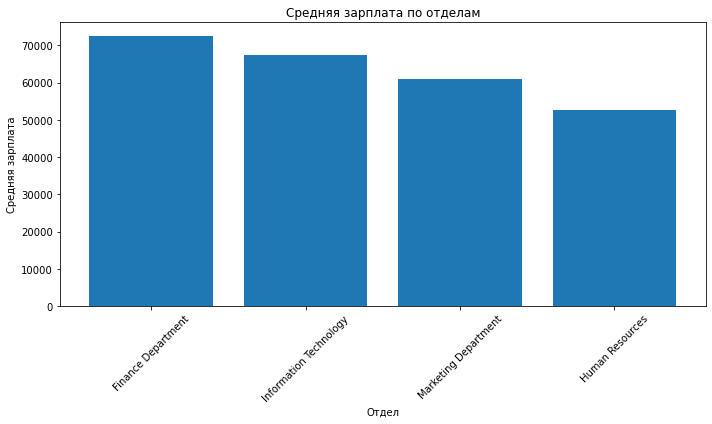

In [64]:
# Визуализация средней зарплаты по отделам
plt.figure(figsize=(10, 6))
plt.bar(pandas_analysis['dept_name'], pandas_analysis['avg_salary'])
plt.title('Средняя зарплата по отделам')
plt.xlabel('Отдел')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Пример 2: Обработка данных о продажах

In [ ]:

# Создаем файл с данными о продажах
sales_data = """
date,store_id,product_id,quantity,revenue
2023-01-01,1,101,5,250.00
2023-01-01,1,102,3,150.00
2023-01-01,2,101,4,200.00
2023-01-02,1,103,2,100.00
2023-01-02,2,102,5,250.00
2023-01-02,3,101,3,150.00
2023-01-03,1,101,6,300.00
2023-01-03,2,103,4,200.00
2023-01-03,3,102,3,150.00
2023-01-04,1,102,4,200.00
2023-01-04,2,101,5,250.00
2023-01-05,3,103,6,300.00
"""

with open("sales.csv", "w") as f:
    f.write(sales_data)

# Создаем файл с информацией о магазинах
stores_data = """
store_id,store_name,region
1,Downtown Store,East
2,Mall Store,West
3,Suburban Store,North
4,Online Store,Online
"""

with open("stores.csv", "w") as f:
    f.write(stores_data)

# Создаем файл с информацией о продуктах
products_data = """
product_id,product_name,category,unit_price
101,Laptop,Electronics,500.00
102,Smartphone,Electronics,400.00
103,Headphones,Accessories,150.00
104,Tablet,Electronics,300.00
"""

with open("products.csv", "w") as f:
    f.write(products_data)


In [69]:
!hadoop fs -put -f sales.csv /user/ubuntu/sales.csv
!hadoop fs -put -f stores.csv /user/ubuntu/stores.csv
!hadoop fs -put -f products.csv /user/ubuntu/products.csv

In [70]:
# Чтение данных в DataFrame
sales_df = spark.read.csv("sales.csv", header=True, inferSchema=True)
stores_df = spark.read.csv("stores.csv", header=True, inferSchema=True)
products_df = spark.read.csv("products.csv", header=True, inferSchema=True)

In [71]:
# Отображение загруженных данных
print("Sales data:")
sales_df.show()

Sales data:
+----------+--------+----------+--------+-------+
|      date|store_id|product_id|quantity|revenue|
+----------+--------+----------+--------+-------+
|2023-01-01|       1|       101|       5|  250.0|
|2023-01-01|       1|       102|       3|  150.0|
|2023-01-01|       2|       101|       4|  200.0|
|2023-01-02|       1|       103|       2|  100.0|
|2023-01-02|       2|       102|       5|  250.0|
|2023-01-02|       3|       101|       3|  150.0|
|2023-01-03|       1|       101|       6|  300.0|
|2023-01-03|       2|       103|       4|  200.0|
|2023-01-03|       3|       102|       3|  150.0|
|2023-01-04|       1|       102|       4|  200.0|
|2023-01-04|       2|       101|       5|  250.0|
|2023-01-05|       3|       103|       6|  300.0|
+----------+--------+----------+--------+-------+



In [73]:
print("Stores data:")
stores_df.show()

Stores data:
+--------+--------------+------+
|store_id|    store_name|region|
+--------+--------------+------+
|       1|Downtown Store|  East|
|       2|    Mall Store|  West|
|       3|Suburban Store| North|
|       4|  Online Store|Online|
+--------+--------------+------+



In [74]:
print("Products data:")
products_df.show()

Products data:
+----------+------------+-----------+----------+
|product_id|product_name|   category|unit_price|
+----------+------------+-----------+----------+
|       101|      Laptop|Electronics|     500.0|
|       102|  Smartphone|Electronics|     400.0|
|       103|  Headphones|Accessories|     150.0|
|       104|      Tablet|Electronics|     300.0|
+----------+------------+-----------+----------+



In [75]:
# Преобразование строковой даты в тип date
sales_df = sales_df.withColumn("date", to_date(col("date")))

# Соединение данных о продажах с информацией о магазинах и продуктах
sales_expanded_df = sales_df.join(
    stores_df, on="store_id", how="left"
).join(
    products_df, on="product_id", how="left"
)

# Отображение объединенного DataFrame
sales_expanded_df.show()

+----------+--------+----------+--------+-------+--------------+------+------------+-----------+----------+
|product_id|store_id|      date|quantity|revenue|    store_name|region|product_name|   category|unit_price|
+----------+--------+----------+--------+-------+--------------+------+------------+-----------+----------+
|       101|       1|2023-01-01|       5|  250.0|Downtown Store|  East|      Laptop|Electronics|     500.0|
|       102|       1|2023-01-01|       3|  150.0|Downtown Store|  East|  Smartphone|Electronics|     400.0|
|       101|       2|2023-01-01|       4|  200.0|    Mall Store|  West|      Laptop|Electronics|     500.0|
|       103|       1|2023-01-02|       2|  100.0|Downtown Store|  East|  Headphones|Accessories|     150.0|
|       102|       2|2023-01-02|       5|  250.0|    Mall Store|  West|  Smartphone|Electronics|     400.0|
|       101|       3|2023-01-02|       3|  150.0|Suburban Store| North|      Laptop|Electronics|     500.0|
|       101|       1|2023-01

In [76]:
# Анализ продаж по категориям продуктов и регионам
category_region_sales = sales_expanded_df.groupBy("category", "region").agg(
    sum("quantity").alias("total_quantity"),
    round(sum("revenue"), 2).alias("total_revenue"),
    count("*").alias("transaction_count")
).orderBy("category", "region")

category_region_sales.show()

+-----------+------+--------------+-------------+-----------------+
|   category|region|total_quantity|total_revenue|transaction_count|
+-----------+------+--------------+-------------+-----------------+
|Accessories|  East|             2|        100.0|                1|
|Accessories| North|             6|        300.0|                1|
|Accessories|  West|             4|        200.0|                1|
|Electronics|  East|            18|        900.0|                4|
|Electronics| North|             6|        300.0|                2|
|Electronics|  West|            14|        700.0|                3|
+-----------+------+--------------+-------------+-----------------+



In [77]:
# Анализ продаж по дням
daily_sales = sales_expanded_df.groupBy("date").agg(
    sum("quantity").alias("total_quantity"),
    round(sum("revenue"), 2).alias("total_revenue"),
    count("*").alias("transaction_count")
).orderBy("date")

daily_sales.show()

+----------+--------------+-------------+-----------------+
|      date|total_quantity|total_revenue|transaction_count|
+----------+--------------+-------------+-----------------+
|2023-01-01|            12|        600.0|                3|
|2023-01-02|            10|        500.0|                3|
|2023-01-03|            13|        650.0|                3|
|2023-01-04|             9|        450.0|                2|
|2023-01-05|             6|        300.0|                1|
+----------+--------------+-------------+-----------------+



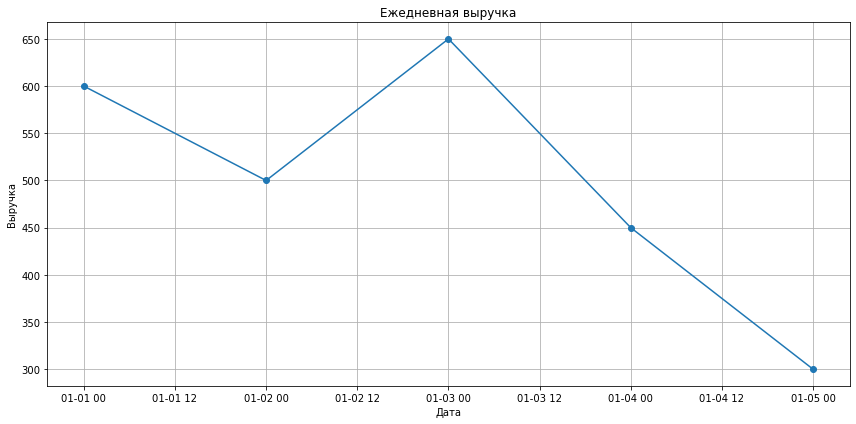

In [78]:
# Преобразование результатов в Pandas DataFrame для визуализации
pandas_daily_sales = daily_sales.toPandas()
pandas_category_sales = category_region_sales.toPandas()

# Визуализация ежедневных продаж
plt.figure(figsize=(12, 6))
plt.plot(pandas_daily_sales['date'], pandas_daily_sales['total_revenue'], marker='o')
plt.title('Ежедневная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

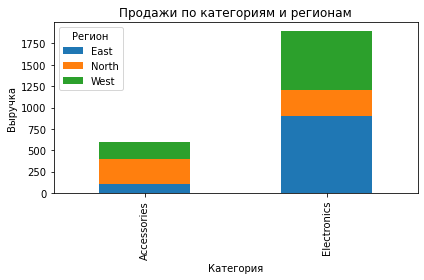

In [79]:
# Визуализация продаж по категориям и регионам
pivot_sales = pandas_category_sales.pivot(index='category', columns='region', values='total_revenue')
pivot_sales.fillna(0, inplace=True)

plt.figure(figsize=(12, 6))
pivot_sales.plot(kind='bar', stacked=True)
plt.title('Продажи по категориям и регионам')
plt.xlabel('Категория')
plt.ylabel('Выручка')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

In [80]:
# Очистка после работы
!rm employees.csv
!rm products.json
!rm sales.csv
!rm stores.csv
!rm products.csv

In [81]:
# Остановка SparkSession
spark.stop()

print("DataFrame практика завершена!")

DataFrame практика завершена!
